# 타이타닉 데이터

In [1]:
# 교재 132p
# kaggle에서 train.csv 다운로드 -> titanic_train.csv 로 이름변경

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic_df.info()    # null, data type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# cavin은 204개 밖에 없네
# Age, Embarked 전처리 필요하겠구만

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [7]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic_df.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [10]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [11]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [12]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

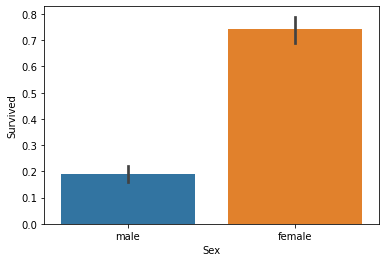

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

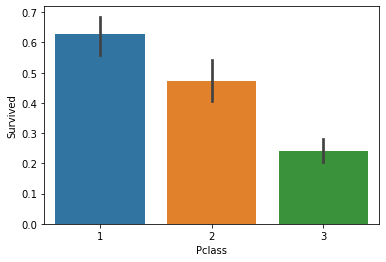

In [15]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

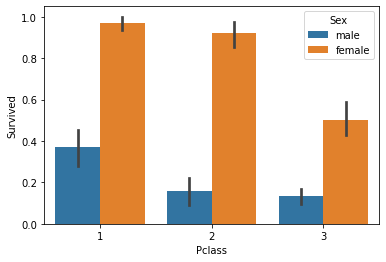

In [16]:
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

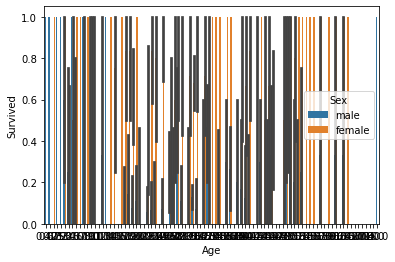

In [17]:
sns.barplot(x='Age',y='Survived', hue='Sex',data=titanic_df)    # Age는 개수가 많아서 잘안보임 -> 구간을 준다.

In [18]:
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

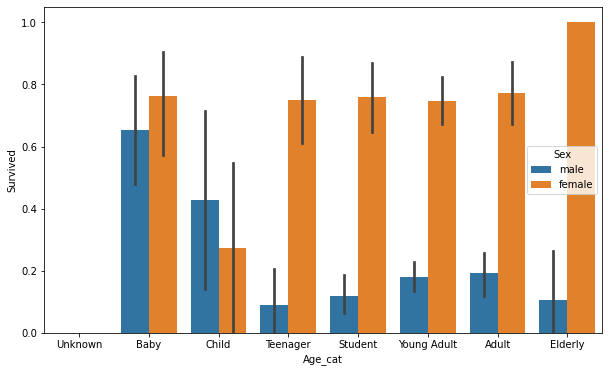

In [19]:
plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']    # 원하는 순서대로
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
def encode_features(dataDf):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        dataDf[feature] = LabelEncoder().fit_transform(dataDf[feature])    # fit에 넣어주는 값과 transform에 넣어주는 값이 같으므로 fit_transform 사용가능
    return dataDf

In [22]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult


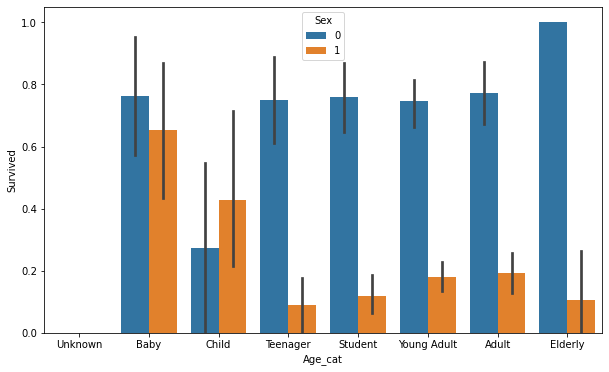

In [23]:
plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']    # 원하는 순서대로
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop(columns='Age_cat',inplace=True)

In [24]:
# 함수 종합

def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])    # fit에 넣어주는 값과 transform에 넣어주는 값이 같으므로 fit_transform 사용가능
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [25]:
titanic_df = pd.read_csv('titanic_train.csv')    # 데이터 불러오고
y_titanic_df = titanic_df['Survived']    # y
X_titanic_df = titanic_df.drop(columns=['Survived'])    # X
X_titanic_df = transform_features(X_titanic_df)    # 함수 처리

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# 과적합을 방지하기 위함.

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=11)

In [28]:
# 분류하는 모델 3가지
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier    # DecisionTree가 여러개 뭉친 것
from sklearn.linear_model import LogisticRegression

# 평가
from sklearn.metrics import accuracy_score

In [29]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [71]:
# 모델 각각 피팅

dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

LogisticRegression()

In [31]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)    # 보편적으로 성능이 좋게 나온대.. 왠지는 못들어따..
lr_pred = lr_clf.predict(X_test)

In [32]:
# 모델별 정확도 비교

print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844


# 20220412

In [60]:
# 이제 교차검증 해야겠지?
from sklearn.model_selection import KFold
# 이 셀에 커서 두고 상단바에 kernel - Restart Kernel and Run up to Selected Cell...하면 이 셀 위로 전부 실행됨(restart)
import warnings
warnings.filterwarnings('ignore')

In [61]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds,shuffle=True)    # shuffle=True면 할 때마다 결과 달라짐
    scores = []
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):    # index값이 나오면
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]    # 데이터를 분리할 수 있다.
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도:{accuracy:.4f}')
    mean_score = np.mean(scores)
    print(f'평균 정확도: {mean_score:.4f}')

In [62]:
# 함수에 모델 넣어주면 됨 = 위에서 이미 피팅한 모델
exec_kfold(dt_clf)    # dt 0.7877094972067039 : 위에서 그냥 검증한 결과  // 교차검증 하면 보통 정확도가 떨어진다!
# shuffle = False 결과
# 교차검증 0 정확도:0.7542
# 교차검증 1 정확도:0.7809
# 교차검증 2 정확도:0.7865
# 교차검증 3 정확도:0.7697
# 교차검증 4 정확도:0.8202
# 평균 정확도: 0.7823

교차검증 0 정확도:0.7654
교차검증 1 정확도:0.7978
교차검증 2 정확도:0.7584
교차검증 3 정확도:0.7584
교차검증 4 정확도:0.7472
평균 정확도: 0.7654


In [63]:
exec_kfold(rf_clf)    # rf 0.8547486033519553
# shuffle = False 결과
# 교차검증 0 정확도:0.7933
# 교차검증 1 정확도:0.8090
# 교차검증 2 정확도:0.8371
# 교차검증 3 정확도:0.7753
# 교차검증 4 정확도:0.8596
# 평균 정확도: 0.8148

교차검증 0 정확도:0.8156
교차검증 1 정확도:0.7640
교차검증 2 정확도:0.8427
교차검증 3 정확도:0.8202
교차검증 4 정확도:0.8034
평균 정확도: 0.8092


In [64]:
exec_kfold(lr_clf)    # lr 0.8491620111731844
# shuffle = False 결과
# 교차검증 0 정확도:0.8045
# 교차검증 1 정확도:0.7809
# 교차검증 2 정확도:0.7753
# 교차검증 3 정확도:0.7584
# 교차검증 4 정확도:0.8371
# 평균 정확도: 0.7912

교차검증 0 정확도:0.7654
교차검증 1 정확도:0.8034
교차검증 2 정확도:0.8090
교차검증 3 정확도:0.8258
교차검증 4 정확도:0.7022
평균 정확도: 0.7812


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)    # cv: 몇등분할거냐
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균정확도:{np.mean(scores):.4f}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균정확도:0.7879


In [67]:
# 내 맘대로 만든 함수
def c_v_s(clf):
    scores = cross_val_score(clf,X_titanic_df,y_titanic_df,cv=5)    # cv: 몇등분할거냐
    for iter_count,accuracy in enumerate(scores):
        print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    print(f'평균정확도:{np.mean(scores):.4f}')

In [68]:
c_v_s(dt_clf)

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균정확도:0.7879


In [69]:
c_v_s(rf_clf)

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균정확도:0.8137


In [70]:
c_v_s(lr_clf)

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8146
평균정확도:0.7879


In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
# DecisionTreeClassifier의 파라메터
parameters = {
    'max_depth':[2,3,5,10],    # 트리 깊이
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

In [75]:
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [76]:
grid_dclf.cv_results_    # 경우별 점수 볼 수있음 -> 근데 보기 어려워서 데이터프레임 형태로 변형시켜 본다.

{'mean_fit_time': array([0.00139666, 0.00179505, 0.00139532, 0.00159631, 0.00140228,
        0.0017962 , 0.00180011, 0.00139756, 0.0017961 , 0.00179377,
        0.00219955, 0.00189075, 0.00158925, 0.00191269, 0.00159011,
        0.00160742, 0.00180321, 0.00160103, 0.00179186, 0.00160885,
        0.00181155, 0.00161104, 0.00199385, 0.00139108, 0.0018086 ,
        0.00159559, 0.00159636, 0.00178185, 0.00201058, 0.00200539,
        0.00180779, 0.00160117, 0.0019959 , 0.00120282, 0.00180988,
        0.00199409]),
 'std_fit_time': array([4.88519610e-04, 3.98874696e-04, 8.10054827e-04, 4.88694689e-04,
        4.84709618e-04, 3.98971403e-04, 3.87693606e-04, 4.87297467e-04,
        3.96299864e-04, 3.97560921e-04, 4.07759193e-04, 4.82879140e-04,
        4.86361218e-04, 5.10832725e-04, 4.83360647e-04, 4.99933505e-04,
        4.16613512e-04, 4.93825771e-04, 3.98319480e-04, 4.98924952e-04,
        4.07979972e-04, 4.75840036e-04, 3.81290871e-06, 4.82430238e-04,
        4.05784370e-04, 4.88013575e-0

In [78]:
grid_dclf.best_params_    # 각각 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}로 했을 때 best더라

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [80]:
grid_dclf.best_score_    # best score

0.7991825076332119

In [81]:
best_dclf = grid_dclf.best_estimator_    # 제일 좋았던 모델

In [82]:
dpred = best_dclf.predict(X_test)

In [83]:
accuracy_score(y_test,dpred)

0.8715083798882681

In [84]:
# 사이킷런에는 매우 많은 머신러닝 알고리즘 제공, 사용이 쉽다. -> 대표적인 머신러닝 패키지
# 머신러닝 : (데이터의 가공 및 변환)전처리작업 -> (학습/테스트 데이터 분리)데이터 세트 분리 작업 -> 모델 학습 -> 테스트데이터 모델로 예측 -> 예측값, 실제값 비교해서 평가
# 전처리 : (오류 데이터 보정, null값 처리 등)다양한 데이터 클렌징 작업, (레이블 인코딩, 원-핫 인코딩 등)인코딩 작업, 데이터 스케일링, 정규화 작업  
#          => 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리 하는 것
# 학습데이터와 테스트데이터는 구분되어야 하며, (데이터 분포-치우치거나 건수부족 X)구성이 중요하다.

In [85]:
# 평균, 중위값, 분산 등 각각의 의의를 알아야한다.** 계산은 컴퓨터가 해줘여..
#                                => 전처리

In [86]:
# 머신러닝 : 데이터 가공/변환 - 모델 학습/예측 - 평가
# 성능 평가 지표(모델 예측 성능 평가) - 분류/회귀 등 종류에 따라 다름
# 정확도, 오차행렬(정밀도,재현율,F1스코어,ROC AUC)
# 분류 -> 정확도로 판단 많이 함, 정확도만 봤을 때의 문제 = 이진분류의 경우 한쪽에 치우치면 제대로 평가할 수 없다. -> 오차행렬 이용

In [87]:
# 성능 지표는 이진/멀티 분류에 모두 적용되지만 이진분류에서 특히 중요
# 정확도 = (맞춘 거) / (전체 데이터)

In [88]:
# 사이킷런은 BaseEstimator?를 상속받는다 -> 모델들을 fit하고 predict로 예측가능

In [89]:
# 정확도만 봤을 때의 문제점 확인

In [91]:
from sklearn.base import BaseEstimator
import numpy as np

In [92]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        return pred
# 으려워..

# 함수 종합
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])    # fit에 넣어주는 값과 transform에 넣어주는 값이 같으므로 fit_transform 사용가능
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
titanic_df = pd.read_csv("titanic_train.csv")    # 데이터 가져오기
y_titanic_df = titanic_df['Survived']            # X,y 분리
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=0)
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test,pred)

0.7877094972067039

In [95]:
# 뭐안했는데? 정확도가 0.7877094972067039  == 정확도만 믿을 수는 없다.

In [96]:
# 그래서 오차행렬을 쓴다.
from sklearn.datasets import load_digits
# 전처리, numpy, pandas 등 다 위에 해서 생략

In [97]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [101]:
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y, random_state=11)
y_test.shape,pd.Series(y_test).value_counts()

((450,),
 0    405
 1     45
 dtype: int64)

In [102]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
pred = fakeclf.predict(X_test)
accuracy_score(y_test,pred)

0.9

In [103]:
# 또 한 것도 없는데 정확도 0.9